In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import pandas as pd
from numba import jit
plt.style.use(['science', 'notebook', 'grid'])

# Persamaan

## Runkut 4 Method

$$K_0=h\cdot F(x,y) $$<br>
$$K_1=h\cdot F(x + \frac{h}{2}, y + \frac{K_0}{2}) $$<br>
$$K_2=h\cdot F(x + \frac{h}{2}, y + \frac{K_1}{2}) $$<br>
$$K_3=h\cdot F(x + h, y + K_2) $$<br>
$$ y_{n+1} = y_n + \frac{K_0 + 2K_1 + 2K_2 + K_3}{6}$$<br>

## Schrodinger Bergantung Waktu

$$ i \hbar \frac{\partial}{\partial t} \psi(x,t) = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x,t) + V(x) \psi(x,t) \hspace{20mm} \psi(0, t) = \psi(L,t)=0 $$

$$ i mL^2 \hbar \frac{\partial}{\partial t} \psi = -\frac{1}{2}\hbar^2 L^2\frac{\partial^2}{\partial x^2}\psi + mL^2V(x) \psi $$

$$ m = \hbar = n = L = 1 $$

$$ i \frac{\partial}{\partial t'} \psi = -\frac{1}{2}\frac{\partial^2}{\partial x'^2}\psi + V'(x) \psi $$

$$ E \psi = -\frac{1}{2}\frac{\partial^2}{\partial x'^2}\psi + V'(x) \psi $$

## V = 0

### Num Schrodinger V = 0

$$\frac{\partial^{2} \psi }{\partial x^{2}} + 2E\psi=0$$ <br>
$$\psi_{n_x}=\sqrt{2}\sin{(n_x\pi x)}$$ <br>
$$E_{n_x} = \frac{(n_x\pi)^{2}}{2} $$<br>

### Num Schrodinger Rk4

$$F[0] = \frac{\partial \psi }{\partial x} = \sqrt{2} n_x\pi\cos{(n_x\pi x)}$$ <br>
$$F[1] = -2E \psi = -2E \cdot \sqrt{2}\sin{(n_x\pi x)} $$<br>



### Analytical Schrodinger V = 0

$$\psi_{n_x}=\sqrt{2} e^{-iE_{n_x}t} \sin{(n_x\pi x)}$$ <br>
$$R(\psi_{n_x})=\sqrt{2} \cos{(E_{n_x}t)} \sin{(n_x\pi x)}$$ <br>

## Error

$$e = R(\psi_{num}) - R(\psi_{ana})$$<br>

# Function

In [2]:
def run_kut4(F,x,y,h,n):
        K0 = h*F(x,y, n)
        K1 = h*F(x + h/2.0, y + K0/2.0, n)
        K2 = h*F(x + h/2.0, y + K1/2.0, n)
        K3 = h*F(x + h, y + K2, n)
        return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0    

In [3]:
def runkut_int(F,n,x,y,xStop,h): #x = xi,  y = boundary, xStop = xfinal, h = step
    N = int((xStop - x)/h)
    E = (n*np.pi)**2/2
    X = np.zeros(N+1)
    Y = np.zeros((N+1,2))
    X[0] += x
    Y[0] += y
    for i in range(1,N+1):
        y = y + run_kut4(F,x,y,h,n)
        x = x + h
        X[i] += x
        Y[i] += y
    
    nor1 = np.sum(np.absolute(Y.T[0])**2)
    nor2 = np.sum(np.absolute(Y.T[1])**2)
    psi = np.zeros((N+1,2))
    for j in range(0, N+1):
        psi[j][0] += np.abs((Y[j][0])**2)/nor1
        psi[j][1] += np.abs(Y[j][1])**2/nor2
        
    return X, Y.T[0], psi.T[0]

In [4]:
def graph2(a,b,a2,b2,title):
    fig = plt.figure(figsize=(10,5))
    plt.rcParams.update({'font.size': 15})
    ax = fig.add_subplot(111)
    ax.tick_params(colors='red', which='both')
    plt.title('{}'.format(title), fontsize = 20, color = 'red')
    plt.xlabel('t', fontsize = 20, color = 'red')
    plt.ylabel('x', fontsize = 20, color = 'red')
    plt.plot(a,b, 'o-', color = 'r', label = 'x solution')
    plt.plot(a2,b2, 'o-', color = 'g', label = 'v solution')
    plt.grid()
    plt.legend(loc='upper center', fontsize=10)
    plt.show()
    
def graph(a,b,title):
    fig = plt.figure(figsize=(10,5))
    plt.rcParams.update({'font.size': 15})
    plt.title('{}'.format(title), fontsize = 20, color = 'red')
    plt.xlabel('x')
    plt.ylabel('psi')
    plt.plot(a,b, 'o-', color = 'r', label = 'x solution')
    plt.legend(loc='upper center', fontsize=10)
    plt.show()

In [5]:
def psi0(x,y,n):
    E = ((n*np.pi)**2)/2
    psi = np.sqrt(2)*np.sin(n*np.pi*x)
    dpsidx =  np.sqrt(2)*n*np.pi*np.cos(n*np.pi*x)
    psi_ = np.zeros(2)
    psi_[0] = dpsidx #dpsi dx
    psi_[1] = -2*E*psi #dpsi**2 dx**2
    return psi_

# RK4 Schrodinger

In [6]:
xi = 0 
xf = 1
bound = np.array([0, 0])
step = xf/100

In [7]:
x1, y1, y_nor1 = runkut_int(F=psi0,n=1,x=xi,y=bound,xStop=xf,h=step)
x2, y2, y_nor2 = runkut_int(F=psi0,n=2,x=xi,y=bound,xStop=xf,h=step)
x3, y3, y_nor3 = runkut_int(F=psi0,n=3,x=xi,y=bound,xStop=xf,h=step)
x4, y4, y_nor4 = runkut_int(F=psi0,n=4,x=xi,y=bound,xStop=xf,h=step)
x5, y5, y_nor5 = runkut_int(F=psi0,n=5,x=xi,y=bound,xStop=xf,h=step)
x6, y6, y_nor6 = runkut_int(F=psi0,n=6,x=xi,y=bound,xStop=xf,h=step)

In [8]:
def graph5(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,a6,b6,title):
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots(2,3, sharey=True)
    
    ax[0,0].plot(a1,b1)
    ax[0,0].set_xlabel('x')
    ax[0,0].set_ylabel('\u03C8')
    
    ax[0,1].plot(a2,b2)
    ax[0,1].set_xlabel('x')
    ax[0,1].set_ylabel('\u03C8')
    
    ax[0,2].plot(a3,b3)
    ax[0,2].set_xlabel('x')
    ax[0,2].set_ylabel('\u03C8')
    
    ax[1,0].plot(a4,b4)
    ax[1,0].set_xlabel('x')
    ax[1,0].set_ylabel('\u03C8')
    
    ax[1,1].plot(a5,b5)
    ax[1,1].set_xlabel('x')
    ax[1,1].set_ylabel('\u03C8')
    
    ax[1,2].plot(a6,b6)
    ax[1,2].set_xlabel('x')
    ax[1,2].set_ylabel('\u03C8')
    
    plt.suptitle('{}'.format(title))
    plt.show()

<Figure size 1000x600 with 0 Axes>

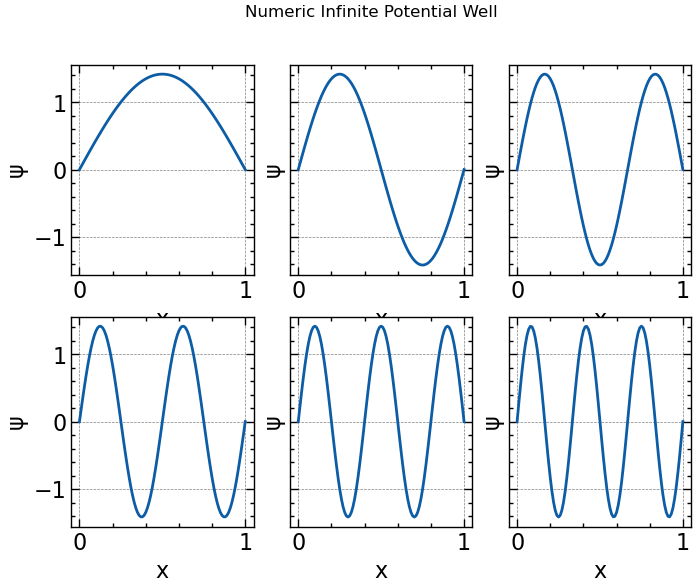

In [9]:
graph5(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,title='Numeric Infinite Potential Well')

<Figure size 1000x600 with 0 Axes>

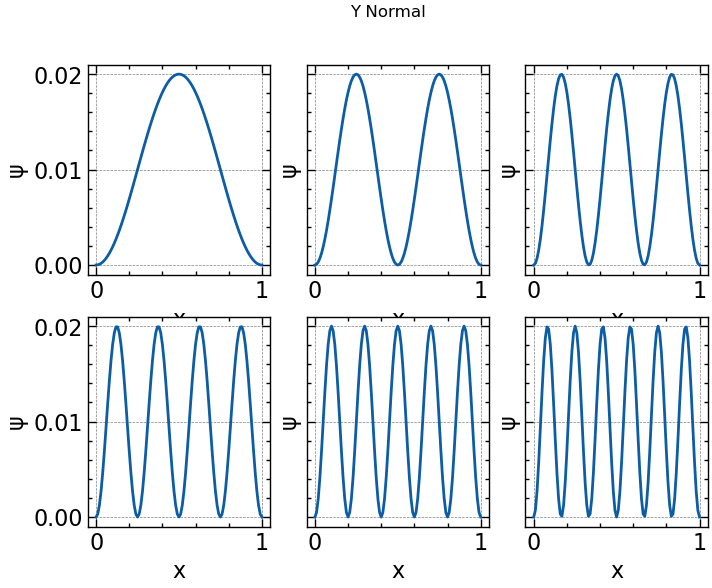

In [10]:
graph5(x1,y_nor1,x2,y_nor2,x3,y_nor3,x4,y_nor4,x5,y_nor5,x6,y_nor6,title='Y Normal')

# Schrodinger Analytic

In [11]:
xi = 0 
xf = 1
bound = 0
t = 0
step = xf/100

In [12]:
def psi_ana(x,n,t):
    E = (n*np.pi)**2/2
    psi = np.sqrt(2)*np.cos(E*t)*np.sin(n*np.pi*x)
    return psi

In [13]:
def schrodinger_ana(F,n,t,x,y,xStop,h): #x = xi,  y = boundary, xStop = xfinal, h = step
    E = ((n*np.pi)**2)/2
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x <= xStop :
        x = x + h
        y = abs(F(x,n,t))
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y), E

In [14]:
x_ana1, psi_ana1, E1 = schrodinger_ana(F=psi_ana,n=1,t=0,x=xi,y=bound,xStop=xf,h=step)
x_ana2, psi_ana2, E2 = schrodinger_ana(F=psi_ana,n=2,t=0,x=xi,y=bound,xStop=xf,h=step)
x_ana3, psi_ana3, E3 = schrodinger_ana(F=psi_ana,n=3,t=0,x=xi,y=bound,xStop=xf,h=step)
x_ana4, psi_ana4, E4 = schrodinger_ana(F=psi_ana,n=4,t=0,x=xi,y=bound,xStop=xf,h=step)
x_ana5, psi_ana5, E5 = schrodinger_ana(F=psi_ana,n=5,t=0,x=xi,y=bound,xStop=xf,h=step)
x_ana6, psi_ana6, E6 = schrodinger_ana(F=psi_ana,n=6,t=0,x=xi,y=bound,xStop=xf,h=step)

<Figure size 1000x600 with 0 Axes>

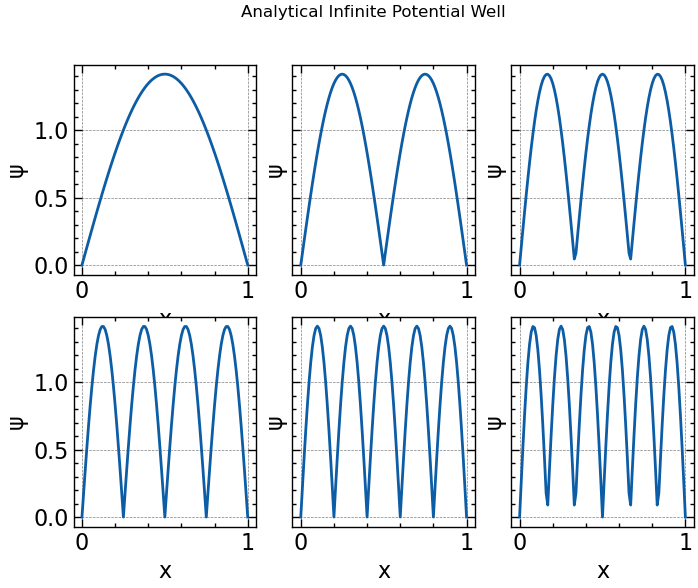

In [15]:
graph5(x_ana1,psi_ana1,x_ana2,psi_ana2,x_ana3,psi_ana3,x_ana4,psi_ana4,x_ana5,psi_ana5,x_ana6,psi_ana6,title='Analytical Infinite Potential Well')

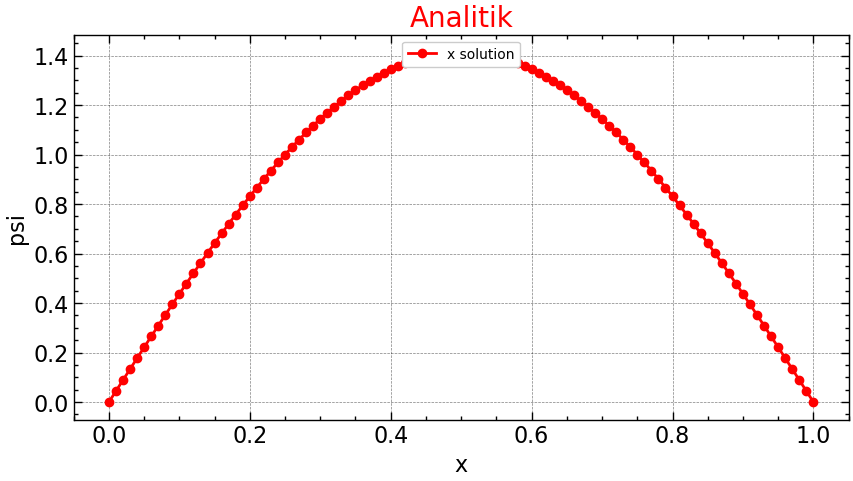

In [16]:
graph(x_ana1, psi_ana1, 'Analitik')

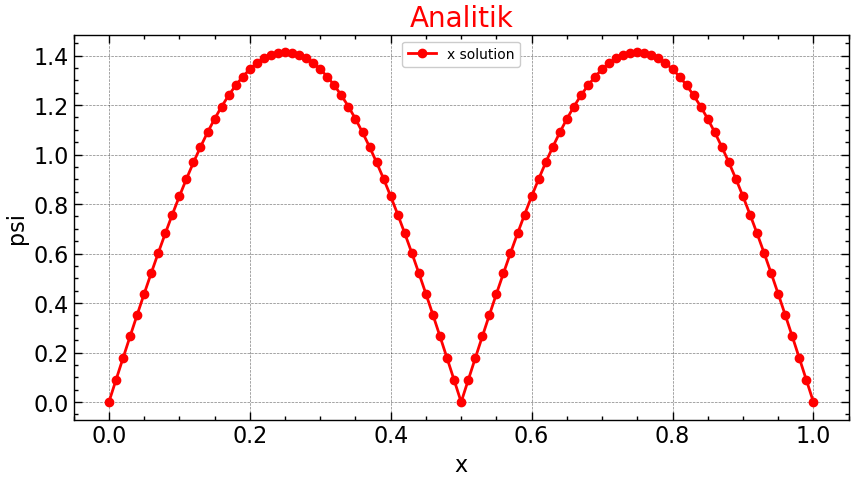

In [17]:
graph(x_ana2, psi_ana2, 'Analitik')

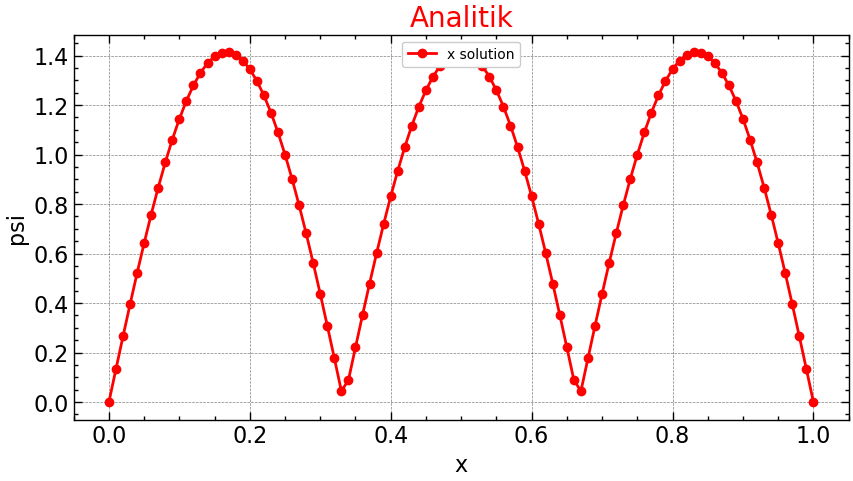

In [18]:
graph(x_ana3, psi_ana3, 'Analitik')

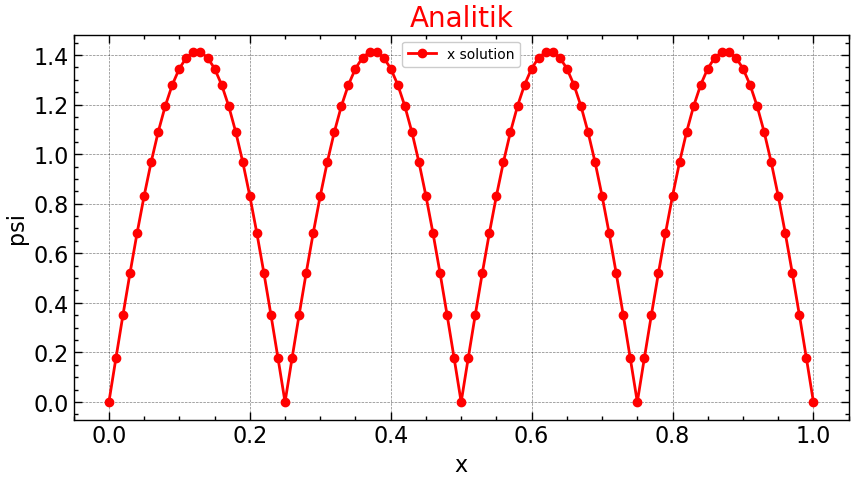

In [19]:
graph(x_ana4, psi_ana4, 'Analitik')

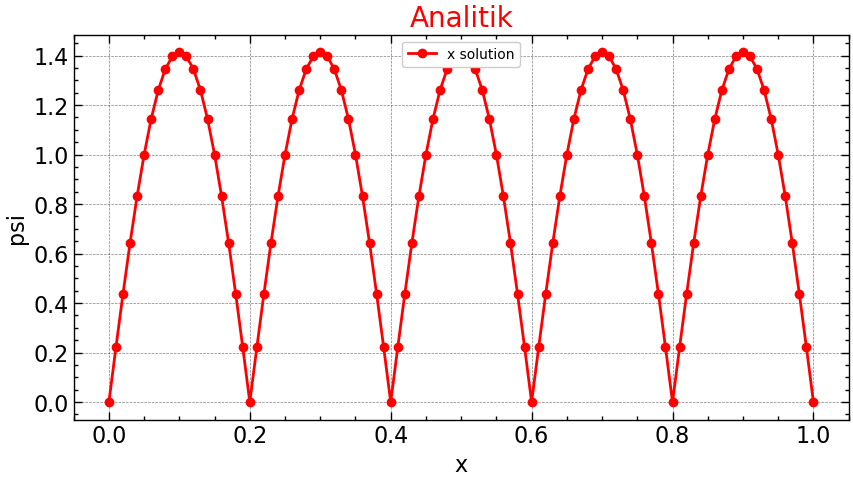

In [20]:
graph(x_ana5, psi_ana5, 'Analitik')

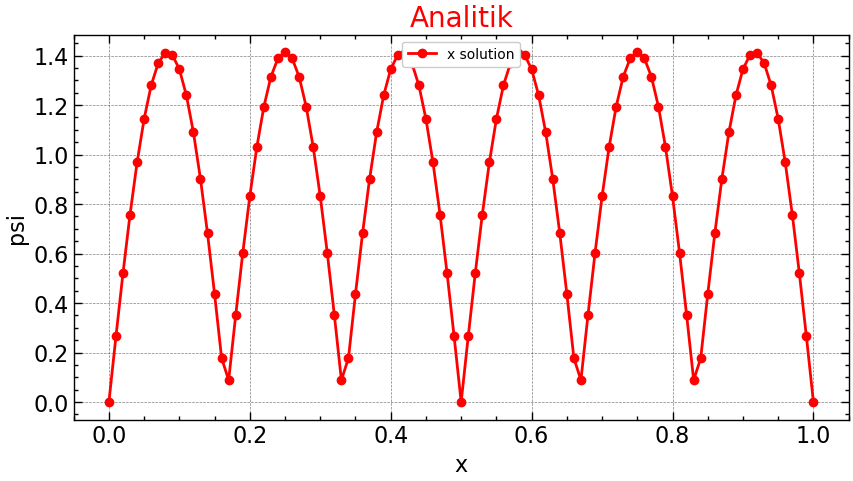

In [21]:
graph(x_ana6, psi_ana6, 'Analitik')

In [22]:
data = {'x_num' : x1,
        'psi_num': y1,
        'x_ana' : x_ana1,
        'psi_ana': psi_ana1,
       }
df = pd.DataFrame(data)
df

,x_num,psi_num,x_ana,psi_ana
0,0.00,0.000000e+00,0.00,0.000000e+00
1,0.01,4.442152e-02,0.01,4.442152e-02
2,0.02,8.879920e-02,0.02,8.879920e-02
3,0.03,1.330893e-01,0.03,1.330893e-01
4,0.04,1.772480e-01,0.04,1.772480e-01
...,...,...,...,...
96,0.96,1.772480e-01,0.96,1.772480e-01
97,0.97,1.330893e-01,0.97,1.330893e-01
98,0.98,8.879920e-02,0.98,8.879920e-02
99,0.99,4.442152e-02,0.99,4.442152e-02


In [23]:
def Error_real(num,ana):
    N = len(ana)
    temp = np.zeros(N)
    for i in range(N):
        temp[i] = num[i] - ana[i]
    return temp

In [24]:
err = Error_real(y1,psi_ana1)

In [25]:
display(sum(err))
display(err)

3.0449365247342155e-08

array([ 0.00000000e+00,  1.50249604e-11,  3.00350717e-11,  4.50155746e-11,
        5.99515992e-11,  7.48285045e-11,  8.96315244e-11,  1.04346143e-10,
        1.18957733e-10,  1.33451916e-10,  1.47814538e-10,  1.62031222e-10,
        1.76088033e-10,  1.89971039e-10,  2.03666417e-10,  2.17160956e-10,
        2.30441000e-10,  2.43493670e-10,  2.56306198e-10,  2.68865707e-10,
        2.81159762e-10,  2.93176372e-10,  3.04903658e-10,  3.16330073e-10,
        3.27444405e-10,  3.38235662e-10,  3.48693074e-10,  3.58806096e-10,
        3.68565400e-10,  3.77960552e-10,  3.86982890e-10,  3.95623312e-10,
        4.03873379e-10,  4.11724876e-10,  4.19169810e-10,  4.26201296e-10,
        4.32812230e-10,  4.38995951e-10,  4.44746462e-10,  4.50057991e-10,
        4.54925431e-10,  4.59343674e-10,  4.63309169e-10,  4.66817029e-10,
        4.69864370e-10,  4.72447859e-10,  4.74565276e-10,  4.76214179e-10,
        4.77393458e-10,  4.78101114e-10,  4.78337148e-10,  4.78101114e-10,
        4.77393236e-10,  